In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
data = fetch_openml('mnist_784', version=1)

In [4]:
pca = PCA(n_components=2)

In [5]:
X = data.data.astype('float64')
Y = data.target.astype('str')

In [6]:
x_transofrmed = pca.fit_transform(X)

In [7]:
data_transformed = np.vstack((x_transofrmed.T, Y)).T

In [8]:
data_transformed.shape

(70000, 3)

In [9]:
data_plot = pd.DataFrame(data_transformed, columns=('PCA1', 'PCA2', 'label'))


In [10]:
data_plot.head()

,PCA1,PCA2,label
0,122.249936,-316.255271,5
1,1010.495299,-289.910279,0
2,-58.99659,393.652246,4
3,-796.962874,-607.449908,1
4,-391.316707,729.878652,9


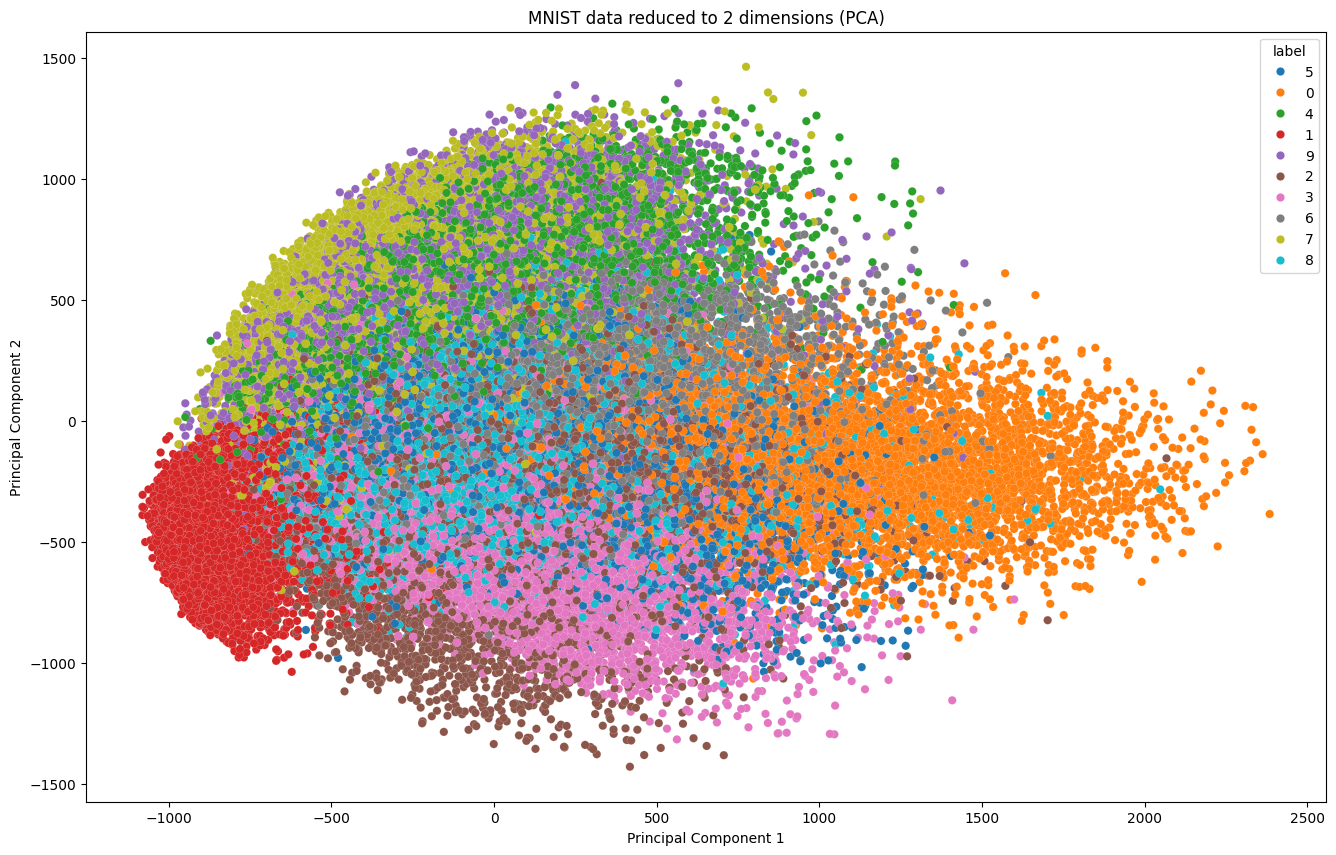

In [11]:

plt.figure(figsize=(16, 10))
sns.scatterplot(data=data_plot, x='PCA1', y='PCA2', hue = 'label', palette = 'tab10', edgecolor= 'white', linewidth=0.1)
plt.title('MNIST data reduced to 2 dimensions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


In [12]:
explained_variance_ = np.sum(pca.explained_variance_ratio_)
print('the variance left after tranforamtion to 2D: ', explained_variance_)

the variance left after tranforamtion to 2D:  0.16901560476821306


In [13]:
# representation of how many variance is kept at each number of components (features) chosen

In [14]:
pca1 = PCA()
x_reduced = pca1.fit_transform(X)

In [15]:
x_reduced.shape

(70000, 784)

In [16]:
explained_variance = np.sum(pca1.explained_variance_ratio_)
print('the variance left after tranforamtion: ', explained_variance)

the variance left after tranforamtion:  0.9999999999999999


In [17]:
cum_explained_variance_ration = np.cumsum(pca1.explained_variance_ratio_)

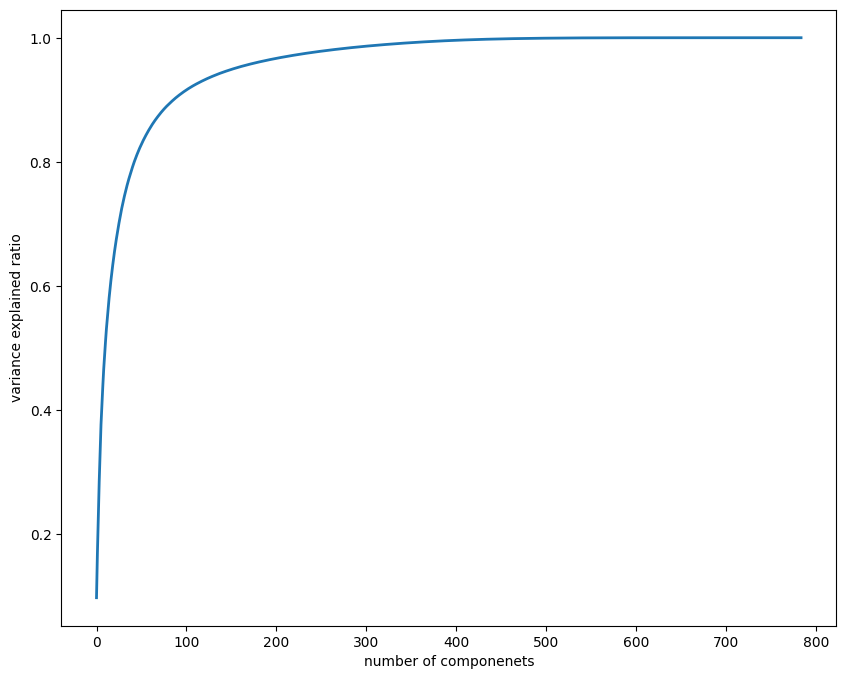

In [18]:
plt.figure(figsize=(10,8))
plt.clf()
plt.plot(cum_explained_variance_ration, linewidth=2)
plt.axis('tight')
plt.xlabel('number of componenets')
plt.ylabel('variance explained ratio')
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
pca2 = PCA(n_components=0.9, svd_solver='full')
x_train_transformed = pca2.fit_transform(x_train)
x_test_transformed = pca2.transform(x_test)

In [21]:
np.sum(pca2.explained_variance_ratio_)

0.9004987647046298

In [22]:
x_train_transformed.shape

(56000, 87)

In [23]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train_transformed, y_train)

y_pred = logistic_regression.predict(x_test_transformed)

C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.svm import SVC

svm_class = SVC()
svm_class.fit(x_train_transformed, y_train)

y_pred_svm = svm_class.predict(x_test_transformed)

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
accuracy_svm = accuracy_score(y_pred_svm, y_test)

print(f'model accuracy is: {accuracy}\nmodel accuracy using svm classifier: {accuracy_svm}')

model accuracy is: 0.9148571428571428
model accuracy using svm classifier: 0.9822142857142857
